## Import Library

In [1]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F
import matplotlib.pyplot as plt

### Create fake data

In [2]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

In [4]:
x = Variable(x)
y = Variable(y)
x

tensor([[ 2.5430,  2.5870],
        [ 3.0500,  1.8910],
        [ 2.0285,  2.5099],
        [ 0.1322, -0.1434],
        [ 2.4533,  2.0131],
        [ 2.7812,  2.2624],
        [ 0.9110,  2.3829],
        [ 1.2547,  3.5680],
        [ 3.8126,  1.0382],
        [ 0.9904,  2.6895],
        [ 0.8109,  3.1810],
        [ 1.4425,  2.0784],
        [ 1.2563,  2.1922],
        [ 1.6647,  1.1227],
        [ 1.9857,  2.4327],
        [ 3.8047,  3.8146],
        [ 2.1978,  1.9714],
        [ 2.1933,  0.3372],
        [ 3.6717,  1.9015],
        [ 1.9942,  1.1259],
        [ 2.0742,  3.0545],
        [ 3.1289,  1.2649],
        [ 2.7549,  2.7571],
        [ 1.7383,  3.2292],
        [ 1.3806,  2.0328],
        [ 2.8457,  3.1163],
        [ 0.6164,  1.3538],
        [ 2.7874,  0.3641],
        [ 2.3013,  2.6635],
        [ 1.9246,  3.9146],
        [ 2.0444,  2.6456],
        [ 1.1199,  1.3840],
        [ 1.5619,  2.2014],
        [ 2.4882,  0.0820],
        [ 1.0428,  1.9868],
        [ 1.2854,  1

In [5]:
y

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

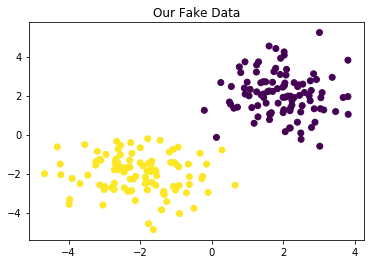

In [12]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy())
plt.title('Our Fake Data')
plt.show()

### 搭建神經網路

In [14]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [15]:
net = Net(2, 10, 2) # 因為有 x, y 軸，所以有 2 個 features

In [18]:
net # net architecture, bias=偏差值

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)

In [21]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02) # lr=learning rate
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.02
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [23]:
loss_func # CrossEntropyLoss(), 計算分類的概率 Ex. [0.1, 0.3, 0.6]
# 分類總和必須為 1

CrossEntropyLoss()

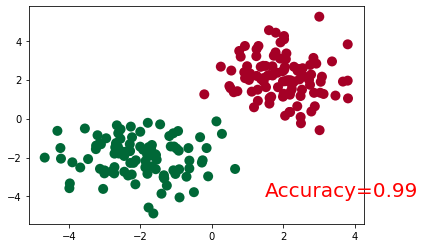

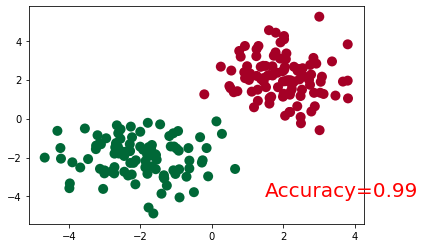

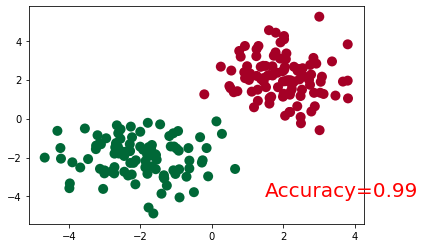

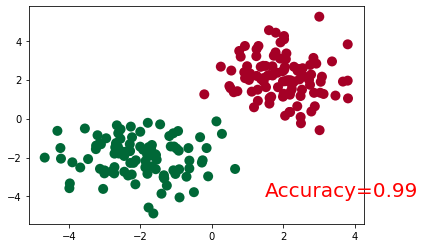

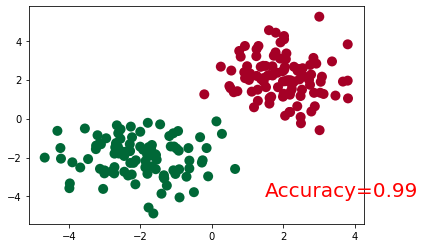

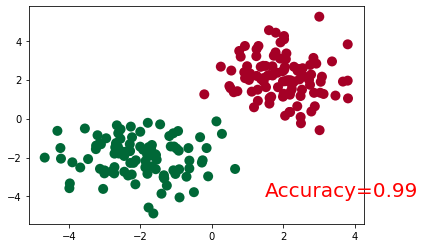

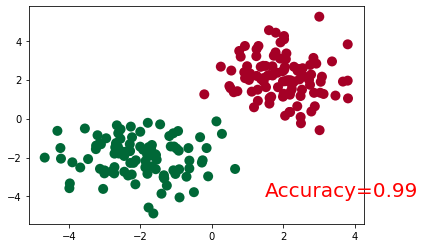

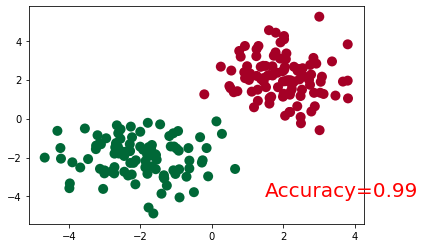

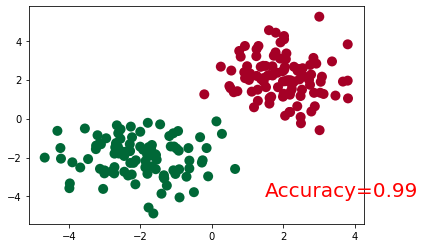

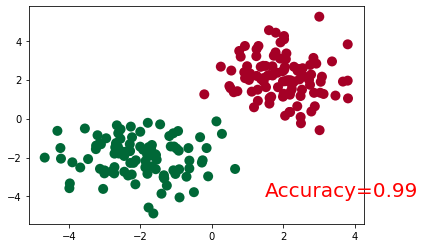

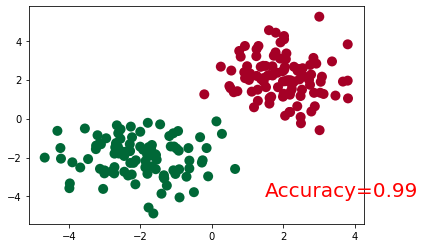

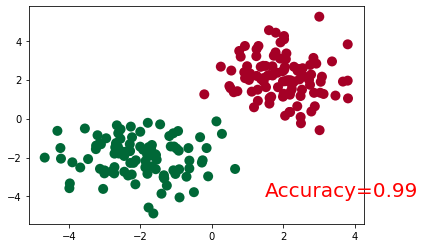

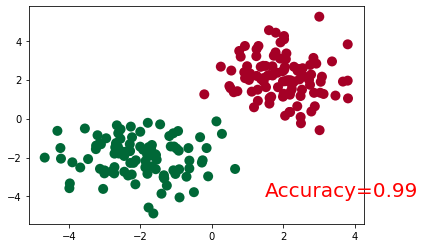

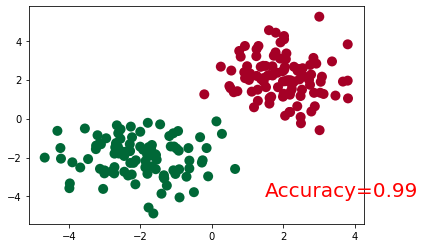

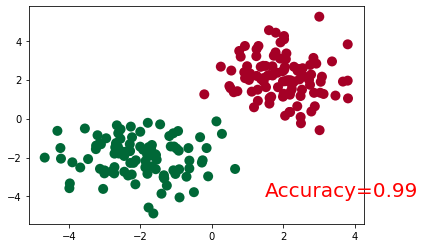

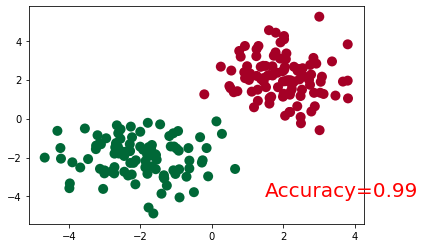

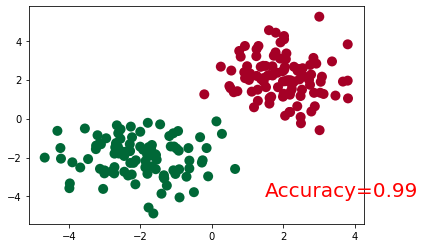

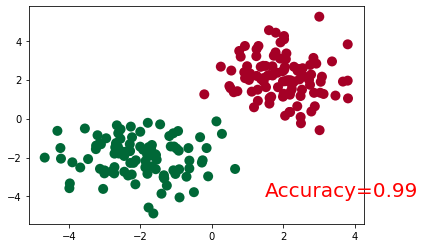

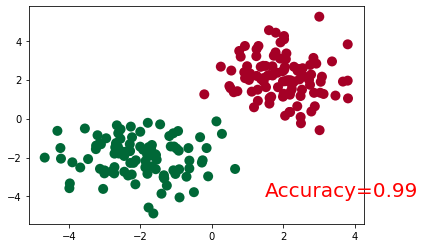

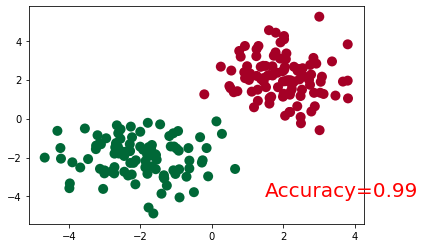

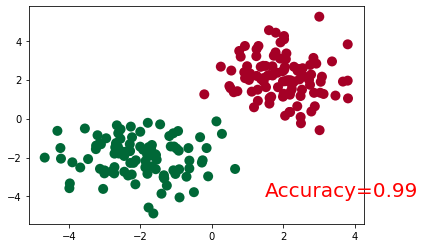

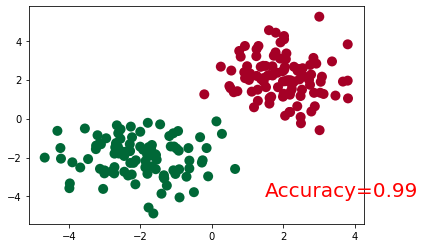

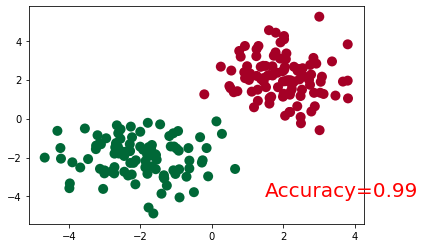

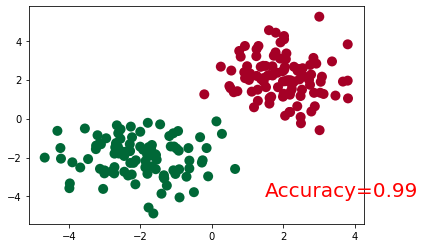

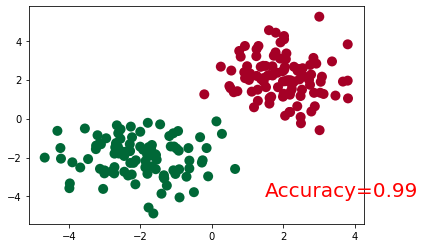

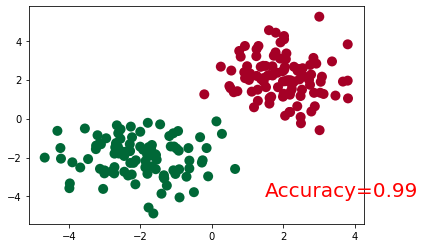

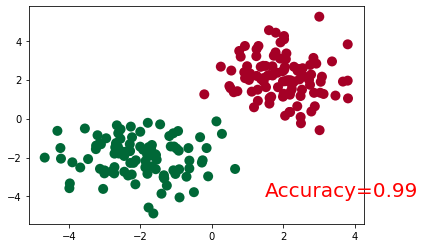

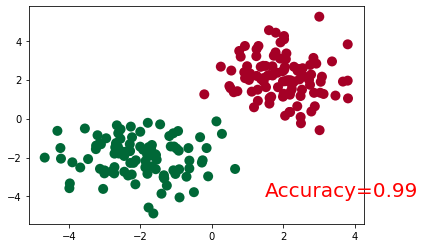

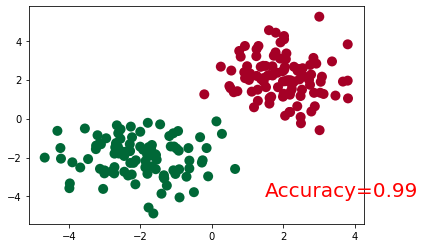

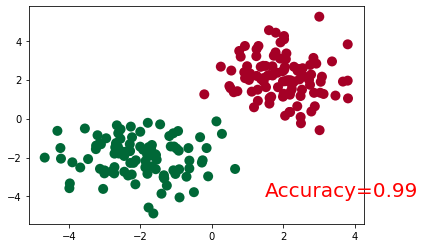

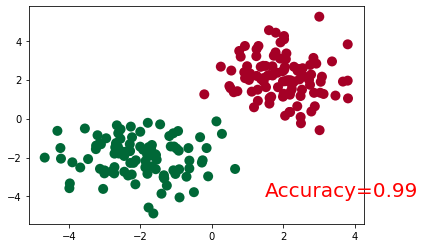

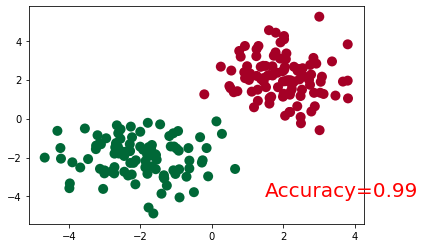

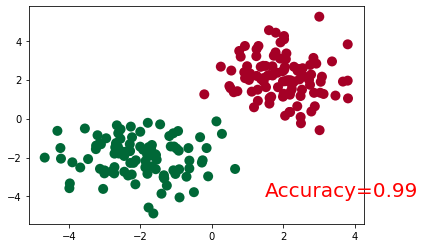

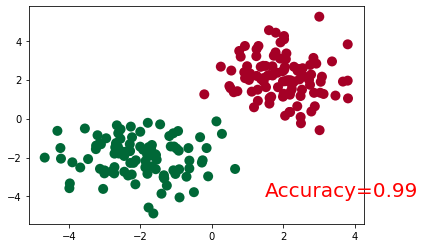

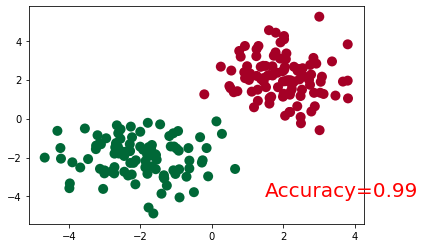

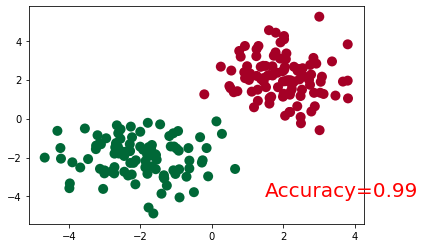

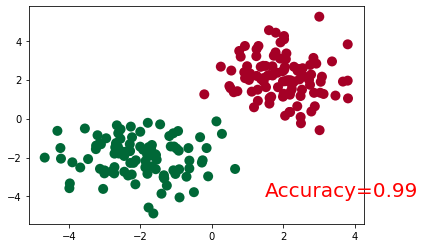

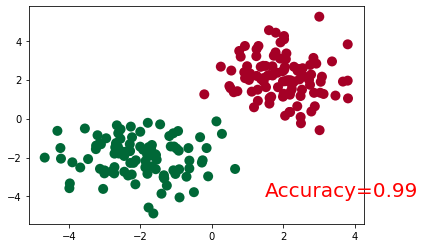

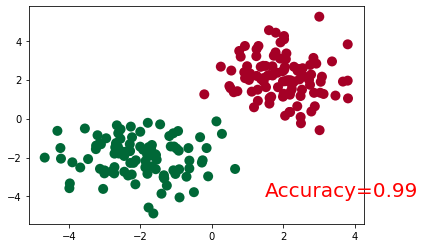

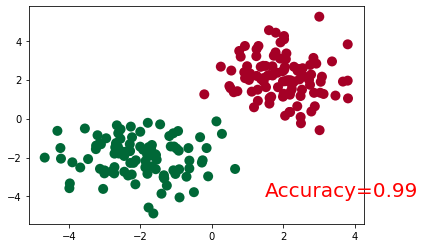

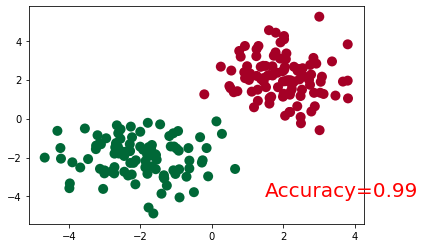

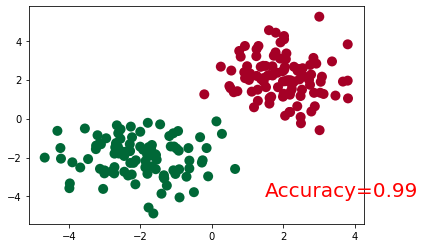

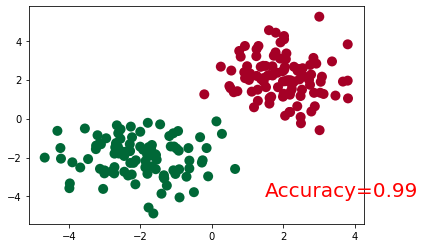

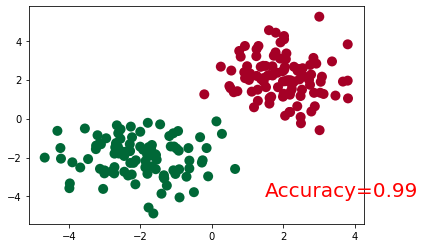

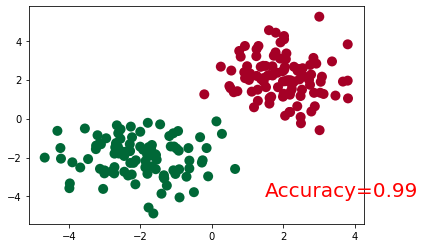

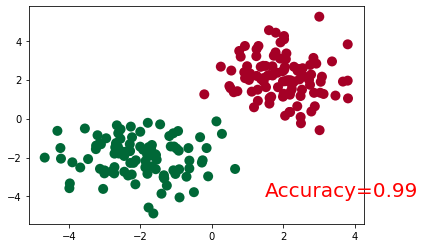

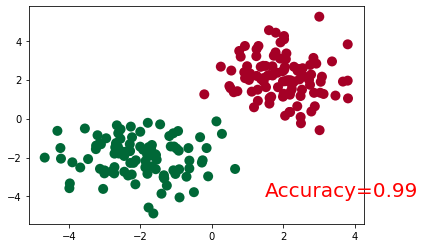

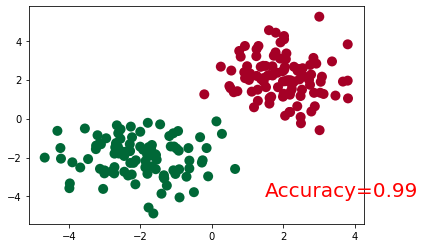

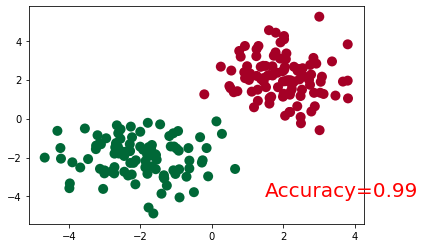

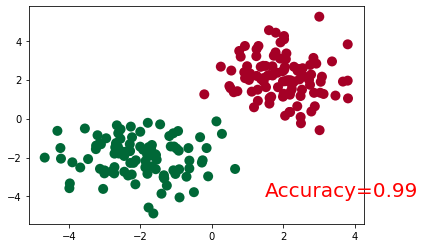

In [27]:
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()